# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


### Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [3]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }

# File Import

### Filename Assignments

In [4]:
# pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
# pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
# pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'
# ///////////////////////////////////////////////
# Merged Database

try:
    pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\'

except:
    pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\'

theWhole = {}


f = []
f_01 = []
mypath_01 = pathBase + 'chr_01'
for (dirpath, dirnames, filenames) in walk(mypath_01):
    f.extend(filenames)
for l in f:
    f_01.append(mypath_01 + '\\' + l) 
        
f = []
f_02 = []
mypath_02 = pathBase + 'chr_02'
for (dirpath, dirnames, filenames) in walk(mypath_02):
    f.extend(filenames)
for l in f:
    f_02.append(mypath_02 + '\\' + l)    
        
f = []
f_03 = []
mypath_03 = pathBase + 'chr_03'
for (dirpath, dirnames, filenames) in walk(mypath_03):
    f.extend(filenames)
for l in f:
    f_03.append(mypath_03 + '\\' + l)    
        
f = []
f_04 = []
mypath_04 = pathBase + 'chr_04'
for (dirpath, dirnames, filenames) in walk(mypath_04):
    f.extend(filenames)
for l in f:
    f_04.append(mypath_04 + '\\' + l)    
        
f = []
f_05 = []
mypath_05 = pathBase + 'chr_05'
for (dirpath, dirnames, filenames) in walk(mypath_05):
    f.extend(filenames)
for l in f:
    f_05.append(mypath_05 + '\\' + l)    
        
f = []
f_06 = []
mypath_06 = pathBase + 'chr_06'
for (dirpath, dirnames, filenames) in walk(mypath_06):
    f.extend(filenames)
for l in f:
    f_06.append(mypath_06 + '\\' + l)    
    
f = []
f_07 = []
mypath_07 = pathBase + 'chr_07'
for (dirpath, dirnames, filenames) in walk(mypath_07):
    f.extend(filenames)
for l in f:
    f_07.append(mypath_07 + '\\' + l)    
        
f = []
f_08 = []
mypath_08 = pathBase + 'chr_08'
for (dirpath, dirnames, filenames) in walk(mypath_08):
    f.extend(filenames)
for l in f:
    f_08.append(mypath_08 + '\\' + l)    
        
f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
f = []
f_10 = []
mypath_10 = pathBase + 'chr_10'
for (dirpath, dirnames, filenames) in walk(mypath_10):
    f.extend(filenames)
for l in f:
    f_10.append(mypath_10 + '\\' + l)    
    
f = []
f_11 = []
mypath_11 = pathBase + 'chr_11'
for (dirpath, dirnames, filenames) in walk(mypath_11):
    f.extend(filenames)
for l in f:
    f_11.append(mypath_11 + '\\' + l)    
    
    
f = []
f_12 = []
mypath_12 = pathBase + 'chr_12'
for (dirpath, dirnames, filenames) in walk(mypath_12):
    f.extend(filenames)
for l in f:
    f_12.append(mypath_12 + '\\' + l)    
    
    
f = []
f_13 = []
mypath_13 = pathBase + 'chr_13'
for (dirpath, dirnames, filenames) in walk(mypath_13):
    f.extend(filenames)
for l in f:
    f_13.append(mypath_13 + '\\' + l)    
    
    
f = []
f_14 = []
mypath_14 = pathBase + 'chr_14'
for (dirpath, dirnames, filenames) in walk(mypath_14):
    f.extend(filenames)
for l in f:
    f_14.append(mypath_14 + '\\' + l)    
    

    
f = []
f_15 = []
mypath_15 = pathBase + 'chr_15'
for (dirpath, dirnames, filenames) in walk(mypath_15):
    f.extend(filenames)
for l in f:
    f_15.append(mypath_15 + '\\' + l)    
    
        
f = []
f_16 = []
mypath_16 = pathBase + 'chr_16'
for (dirpath, dirnames, filenames) in walk(mypath_16):
    f.extend(filenames)
for l in f:
    f_16.append(mypath_16 + '\\' + l)    
    
        
f = []
f_17 = []
mypath_17 = pathBase + 'chr_17'
for (dirpath, dirnames, filenames) in walk(mypath_17):
    f.extend(filenames)
for l in f:
    f_17.append(mypath_17 + '\\' + l)    
    
        
f = []
f_18 = []
mypath_18 = pathBase + 'chr_18'
for (dirpath, dirnames, filenames) in walk(mypath_18):
    f.extend(filenames)
for l in f:
    f_18.append(mypath_18 + '\\' + l)    
    
        
f = []
f_19 = []
mypath_19 = pathBase + 'chr_19'
for (dirpath, dirnames, filenames) in walk(mypath_19):
    f.extend(filenames)
for l in f:
    f_19.append(mypath_19 + '\\' + l)    
    
        
f = []
f_20 = []
mypath_20 = pathBase + 'chr_20'
for (dirpath, dirnames, filenames) in walk(mypath_20):
    f.extend(filenames)
for l in f:
    f_20.append(mypath_20 + '\\' + l)    
   
        
f = []
f_21 = []
mypath_21 = pathBase + 'chr_21'
for (dirpath, dirnames, filenames) in walk(mypath_21):
    f.extend(filenames)
for l in f:
    f_21.append(mypath_21 + '\\' + l)    
   
        
f = []
f_22 = []
mypath_22 = pathBase + 'chr_22'
for (dirpath, dirnames, filenames) in walk(mypath_22):
    f.extend(filenames)
for l in f:
    f_22.append(mypath_22 + '\\' + l)    
   
f = []
f_x = []
mypath_x = pathBase + 'chr_x'
for (dirpath, dirnames, filenames) in walk(mypath_x):
    f.extend(filenames)
for l in f:
    f_x.append(mypath_x + '\\' + l)    
   
f = []
f_y = []
mypath_y = pathBase + 'chr_y'
for (dirpath, dirnames, filenames) in walk(mypath_y):
    f.extend(filenames)
for l in f:
    f_y.append(mypath_y + '\\' + l)  
    
# ///////// Abnormal ones //////////////

f = []
f_18_p11_deletion = []
mypath_18_p11_deletion = pathBase + 'chr_18_p11_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_18_p11_deletion):
    f.extend(filenames)
for l in f:
    f_18_p11_deletion.append(mypath_18_p11_deletion + '\\' + l)  


f = []
f_18_q10_isochromosome = []
mypath_18_q10_isochromosome = pathBase + 'chr_18_q10_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_18_q10_isochromosome):
    f.extend(filenames)
for l in f:
    f_18_q10_isochromosome.append(mypath_18_q10_isochromosome + '\\' + l)  
    
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  
    

f = []
f_5_p14_deletion = []
mypath_5_p14_deletion = pathBase + 'chr_5_p14_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_5_p14_deletion):
    f.extend(filenames)
for l in f:
    f_5_p14_deletion.append(mypath_5_p14_deletion + '\\' + l)  
    

f = []
f_x_isochromosome = []
mypath_x_isochromosome = pathBase + 'chr_x_isochromosome'
for (dirpath, dirnames, filenames) in walk(mypath_x_isochromosome):
    f.extend(filenames)
for l in f:
    f_x_isochromosome.append(mypath_x_isochromosome + '\\' + l)  
    
    
f = []
f_x_p22_cnv = []
mypath_x_p22_cnv = pathBase + 'chr_x_p22_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_p22_cnv):
    f.extend(filenames)
for l in f:
    f_x_p22_cnv.append(mypath_x_p22_cnv + '\\' + l)
    
    
f = []
f_x_q21_cnv = []
mypath_x_q21_cnv = pathBase + 'chr_x_q21_cnv'
for (dirpath, dirnames, filenames) in walk(mypath_x_q21_cnv):
    f.extend(filenames)
for l in f:
    f_x_q21_cnv.append(mypath_x_q21_cnv + '\\' + l)  
    
    
f = []
f_x_q22_deletion = []
mypath_x_q22_deletion = pathBase + 'chr_x_q22_deletion'
for (dirpath, dirnames, filenames) in walk(mypath_x_q22_deletion):
    f.extend(filenames)
for l in f:
    f_x_q22_deletion.append(mypath_x_q22_deletion + '\\' + l)      

    
theWhole['chr_01'] = f_01
theWhole['chr_02'] = f_02
theWhole['chr_03'] = f_03
theWhole['chr_04'] = f_04
theWhole['chr_05'] = f_05
theWhole['chr_06'] = f_06
theWhole['chr_07'] = f_07
theWhole['chr_08'] = f_08
theWhole['chr_09'] = f_09
theWhole['chr_10'] = f_10
theWhole['chr_11'] = f_11
theWhole['chr_12'] = f_12
theWhole['chr_13'] = f_13
theWhole['chr_14'] = f_14
theWhole['chr_15'] = f_15
theWhole['chr_16'] = f_16
theWhole['chr_17'] = f_17
theWhole['chr_18'] = f_18
theWhole['chr_19'] = f_19
theWhole['chr_20'] = f_20
theWhole['chr_21'] = f_21
theWhole['chr_22'] = f_22
theWhole['chr_x'] = f_x
theWhole['chr_y'] = f_y

theWhole['chr_18_p11_deletion'] = f_18_p11_deletion
theWhole['chr_18_q10_isochromosome'] = f_18_q10_isochromosome

theWhole['chr_9_inversion'] = f_9_inversion

theWhole['chr_5_p14_deletion'] = f_5_p14_deletion    

theWhole['chr_x_isochromosome'] = f_x_isochromosome
theWhole['chr_x_p22_cnv'] = f_x_p22_cnv
theWhole['chr_x_q21_cnv'] = f_x_q21_cnv
theWhole['chr_x_q22_deletion'] = f_x_q22_deletion

In [5]:
theWhole['chr_x']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 'D:\\Users\\Chuan\

In [6]:
type(theWhole['chr_x'])

list

In [7]:
len(theWhole)

32

In [8]:
type(theWhole)

dict

In [9]:
theWhole.keys()

dict_keys(['chr_01', 'chr_02', 'chr_03', 'chr_04', 'chr_05', 'chr_06', 'chr_07', 'chr_08', 'chr_09', 'chr_10', 'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15', 'chr_16', 'chr_17', 'chr_18', 'chr_19', 'chr_20', 'chr_21', 'chr_22', 'chr_x', 'chr_y', 'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 'chr_9_inversion', 'chr_5_p14_deletion', 'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv', 'chr_x_q22_deletion'])

### Helper Functions

In [10]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [11]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

# Cross Validation

### KFold

- Let's say split every class into 7 folds

In [12]:
kfold = KFold(7, True, 1)

# 分成7个子集，每次6个子集用于训练，1个子集用于测试
# 每种分法进行一次训练和测试的迭代，总共8次迭代。

In [13]:
X_train_name = {}
X_test_name = {}

# 赋值两个接收文件路径的dictionary，其第一个key值为染色体或异常核型的名称，第二个为迭代的序号

for chrNo in theWhole.keys():

    X_train_name[chrNo] = {}
    X_test_name[chrNo] = {}
    
    # chrNo为染色体号或异常核型号，在此内部再定义迭代次数

    split_method_number = 0
    
    # 赋值每次split分法的序号值

    generator_kFold = kfold.split(theWhole[chrNo])
    
    # 依染色体或异常核型的类型进行split，因为每个类别的样本量不均衡，以每个类别进行split
    # 赋值一个generator对象，以下对generator进行迭代。
    
    print('Chromosome/Abnormality: ', chrNo)

    for train, test in generator_kFold:    
        
        # 循环产生train和test集

        print('Split Method No. ', split_method_number)

        print('Train: ', train, 'Test: ', test, '\n')

        # train和test的值是7个split分法的每个分法的list

        X_train_name[chrNo][split_method_number] = []
        X_test_name[chrNo][split_method_number] = []




        for split_method_train in train:
            
            # train 为训练集list中的序号值

            # split_method_train的值是每个split方法，其值为图像序号
            
            X_train_name[chrNo][split_method_number].append(theWhole[chrNo][split_method_train])
            
            # 将训练集那个序号的图像的文件path和文件名赋值给X_train_name这个二维dictionary


        for split_method_test in test:

            # split_method_test的值是每个split方法，其值为图像序号
            
            X_test_name[chrNo][split_method_number].append(theWhole[chrNo][split_method_test])
            
            # 同样将测试集的路径和文件名赋值给X_test_name

        split_method_number = split_method_number + 1
        
        # Split分法序号自加

Chromosome/Abnormality:  chr_01
Split Method No.  0
Train:  [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 27 28 29 30 31 32 35 36 37 38 39 41 42 43 45 46 47 48 49 50 51 52 53 56
 57 58 59 61 62 63 64 65 66 67 68 70 71 72] Test:  [10 19 26 33 34 40 44 54 55 60 69] 

Split Method No.  1
Train:  [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 28 29 30 31 32 33 34 36 37 38 40 41 42 44 45 46 48 49 50 51 52 54 55
 56 57 58 60 61 62 63 64 65 66 68 69 70 72] Test:  [ 2 15 27 35 39 43 47 53 59 67 71] 

Split Method No.  2
Train:  [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 32 33 34 35 37 39 40 41 42 43 44 45 46 47 48 49 50 51 53
 54 55 59 60 61 62 63 64 66 67 69 70 71 72] Test:  [ 3 21 31 36 38 52 56 57 58 65 68] 

Split Method No.  3
Train:  [ 1  2  3  4  5  6  9 10 11 12 13 14 15 16 18 19 20 21 22 23 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 47 49 50 51 52 53 54 55
 56 57 5

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guid

In [14]:
len(X_train_name['chr_01'])

7

In [15]:
len(X_train_name['chr_01'][0])

62

In [16]:
len(X_test_name['chr_01'][0])

11

In [17]:
X_train_name['chr_01'][1]

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1L.bmp',
 'D:\\Users\\Chuan\\Docume

In [18]:
X_test_name['chr_01'][1]

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21025~A.0002.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21570~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21588~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21906~A.0011.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22451~A.0011.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22670~A.0006.K.jpg.1L.bmp',
 'D:\\Users\\C

In [19]:
X_train_name

{'chr_01': {0: ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.b

In [20]:
performanceReport = {}

# Iteration Starts Here:

# Iteration 0

### Image Input

#### Assignment of Training Data

In [21]:
iteration_number = 0

In [22]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][iteration_number]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

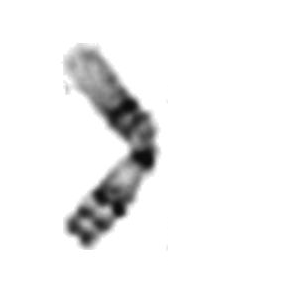

In [23]:
image['chr_01'][1]

### Data Extraction from Images

#### Training Set Data

In [24]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [25]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

#### Testing Set Data

In [26]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][iteration_number]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

In [27]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [28]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### ChromConvert

In [29]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### Change to Numpy Array

In [30]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [31]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [32]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17,
       17, 17, 17, 17, 17

In [33]:
len(X_train)

2449

In [34]:
X_train[0].shape

(300, 300)

### Convolutional Neural Network

#### Data Preparation

In [35]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

#### Training

- Model

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [38]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

- Tensorboard Initilization

In [39]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

- Compile the modal

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- Fitting

In [41]:
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/200
39/39 [==============================] - 9s 158ms/step - loss: 6.7424 - accuracy: 0.0682 - val_loss: 3.1714 - val_accuracy: 0.1127
Epoch 2/200
39/39 [==============================] - 5s 119ms/step - loss: 3.1627 - accuracy: 0.1229 - val_loss: 3.2472 - val_accuracy: 0.1391
Epoch 3/200
39/39 [==============================] - 6s 142ms/step - loss: 2.8153 - accuracy: 0.2136 - val_loss: 2.3158 - val_accuracy: 0.3309
Epoch 4/200
39/39 [==============================] - 6s 145ms/step - loss: 2.2175 - accuracy: 0.3430 - val_loss: 1.9775 - val_accuracy: 0.3885
Epoch 5/200
39/39 [==============================] - 5s 129ms/step - loss: 3.0485 - accuracy: 0.2180 - val_loss: 3.0851 - val_accuracy: 0.1679
Epoch 6/200
39/39 [==============================] - 5s 117ms/step - loss: 2.4848 - accuracy: 0.3005 - val_loss: 2.1384 - val_accuracy: 0.3429
Epoch 7/200
39/39 [==============================] - 5s 117ms/step - loss: 2.8480 - accuracy: 0.2699 - val_loss: 3.0299 - val_accuracy: 0.2062

Epoch 58/200
39/39 [==============================] - 5s 118ms/step - loss: 0.1905 - accuracy: 0.9571 - val_loss: 2.6241 - val_accuracy: 0.5612
Epoch 59/200
39/39 [==============================] - 5s 118ms/step - loss: 0.5113 - accuracy: 0.8906 - val_loss: 3.0476 - val_accuracy: 0.7050
Epoch 60/200
39/39 [==============================] - 5s 122ms/step - loss: 0.1692 - accuracy: 0.9588 - val_loss: 2.2131 - val_accuracy: 0.7362
Epoch 61/200
39/39 [==============================] - 5s 136ms/step - loss: 0.0821 - accuracy: 0.9788 - val_loss: 2.5416 - val_accuracy: 0.7746
Epoch 62/200
39/39 [==============================] - 5s 122ms/step - loss: 0.0819 - accuracy: 0.9857 - val_loss: 2.5827 - val_accuracy: 0.7746
Epoch 63/200
39/39 [==============================] - 6s 143ms/step - loss: 0.1458 - accuracy: 0.9759 - val_loss: 2.2060 - val_accuracy: 0.7602
Epoch 64/200
39/39 [==============================] - 5s 133ms/step - loss: 0.0706 - accuracy: 0.9800 - val_loss: 2.8713 - val_accuracy:

Epoch 115/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0456 - accuracy: 0.9886 - val_loss: 4.3570 - val_accuracy: 0.7746
Epoch 116/200
39/39 [==============================] - 5s 127ms/step - loss: 0.0457 - accuracy: 0.9894 - val_loss: 4.2680 - val_accuracy: 0.7506
Epoch 117/200
39/39 [==============================] - 5s 117ms/step - loss: 0.0404 - accuracy: 0.9914 - val_loss: 3.5994 - val_accuracy: 0.7818
Epoch 118/200
39/39 [==============================] - 5s 122ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 4.4317 - val_accuracy: 0.7722
Epoch 119/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0816 - accuracy: 0.9853 - val_loss: 4.1907 - val_accuracy: 0.7194
Epoch 120/200
39/39 [==============================] - 5s 138ms/step - loss: 0.0620 - accuracy: 0.9841 - val_loss: 4.6526 - val_accuracy: 0.7626
Epoch 121/200
39/39 [==============================] - 6s 153ms/step - loss: 0.0367 - accuracy: 0.9922 - val_loss: 5.1178 - val_ac

39/39 [==============================] - 5s 119ms/step - loss: 0.0021 - accuracy: 0.9984 - val_loss: 9.6940 - val_accuracy: 0.7842
Epoch 172/200
39/39 [==============================] - 5s 123ms/step - loss: 0.0020 - accuracy: 0.9980 - val_loss: 9.7526 - val_accuracy: 0.7818
Epoch 173/200
39/39 [==============================] - 5s 121ms/step - loss: 0.0020 - accuracy: 0.9984 - val_loss: 9.7758 - val_accuracy: 0.7818
Epoch 174/200
39/39 [==============================] - 5s 122ms/step - loss: 0.0020 - accuracy: 0.9980 - val_loss: 9.7350 - val_accuracy: 0.7914
Epoch 175/200
39/39 [==============================] - 5s 117ms/step - loss: 0.0020 - accuracy: 0.9984 - val_loss: 9.8055 - val_accuracy: 0.7842
Epoch 176/200
39/39 [==============================] - 5s 119ms/step - loss: 0.0024 - accuracy: 0.9976 - val_loss: 10.0059 - val_accuracy: 0.7794
Epoch 177/200
39/39 [==============================] - 5s 117ms/step - loss: 0.0020 - accuracy: 0.9984 - val_loss: 10.0722 - val_accuracy: 0.78

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

- Tensorboard Display

In [43]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19276), started 9 days, 7:40:11 ago. (Use '!kill 19276' to kill it.)

#### Save the Model

In [44]:
model.save('saved_model/model_allClass_cnn_iteration_'+str(iteration_number))

INFO:tensorflow:Assets written to: saved_model/model_allClass_cnn_iteration_0\assets


#### Load the Model

In [45]:
model_reload = keras.models.load_model('saved_model/model_allClass_cnn_iteration_'+str(iteration_number))

### Performance Measures

In [46]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.782


In [47]:
len(X_test)

417

In [48]:
y_predict = model_reload.predict(X_test)

In [49]:
len(y_predict)

417

In [50]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

#### Confusion Matrix (混淆矩阵)

In [51]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

In [52]:
label_convert

['chr_x',
 'chr_01',
 'chr_02',
 'chr_03',
 'chr_04',
 'chr_05',
 'chr_06',
 'chr_07',
 'chr_08',
 'chr_09',
 'chr_10',
 'chr_11',
 'chr_12',
 'chr_13',
 'chr_14',
 'chr_15',
 'chr_16',
 'chr_17',
 'chr_18',
 'chr_19',
 'chr_20',
 'chr_21',
 'chr_22',
 'chr_y',
 'chr_18_p11_deletion',
 'chr_18_q10_isochromosome',
 'chr_9_inversion',
 'chr_5_p14_deletion',
 'chr_x_isochromosome',
 'chr_x_p22_cnv',
 'chr_x_q21_cnv',
 'chr_x_q22_deletion']

In [53]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,19,0,0,0,0,0,0,2,0,3,...,1,0,0,0,1,0,0,1,0,0
chr_01,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
chr_02,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
chr_04,0,0,0,0,8,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,0,25,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0
chr_06,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,1,0,0,0
chr_07,0,0,0,0,0,0,1,5,1,1,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,10,1,...,0,0,0,0,0,0,0,0,0,0
chr_09,6,0,0,0,0,0,0,0,1,34,...,0,0,0,0,5,0,0,1,0,0


#### Report

In [54]:
performanceReport[iteration_number] = classification_report(y_test, y_predict_filtered, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport[iteration_number])

                          precision    recall  f1-score   support

                   chr_x       0.58      0.70      0.63        27
                  chr_01       1.00      0.91      0.95        11
                  chr_02       1.00      0.90      0.95        10
                  chr_03       1.00      0.80      0.89        10
                  chr_04       1.00      0.80      0.89        10
                  chr_05       0.83      0.86      0.85        29
                  chr_06       0.90      0.90      0.90        10
                  chr_07       0.71      0.50      0.59        10
                  chr_08       0.77      0.91      0.83        11
                  chr_09       0.69      0.72      0.71        47
                  chr_10       0.82      0.90      0.86        10
                  chr_11       0.80      0.80      0.80        10
                  chr_12       0.70      0.70      0.70        10
                  chr_13       0.90      0.90      0.90        10
         

#### Heat Map

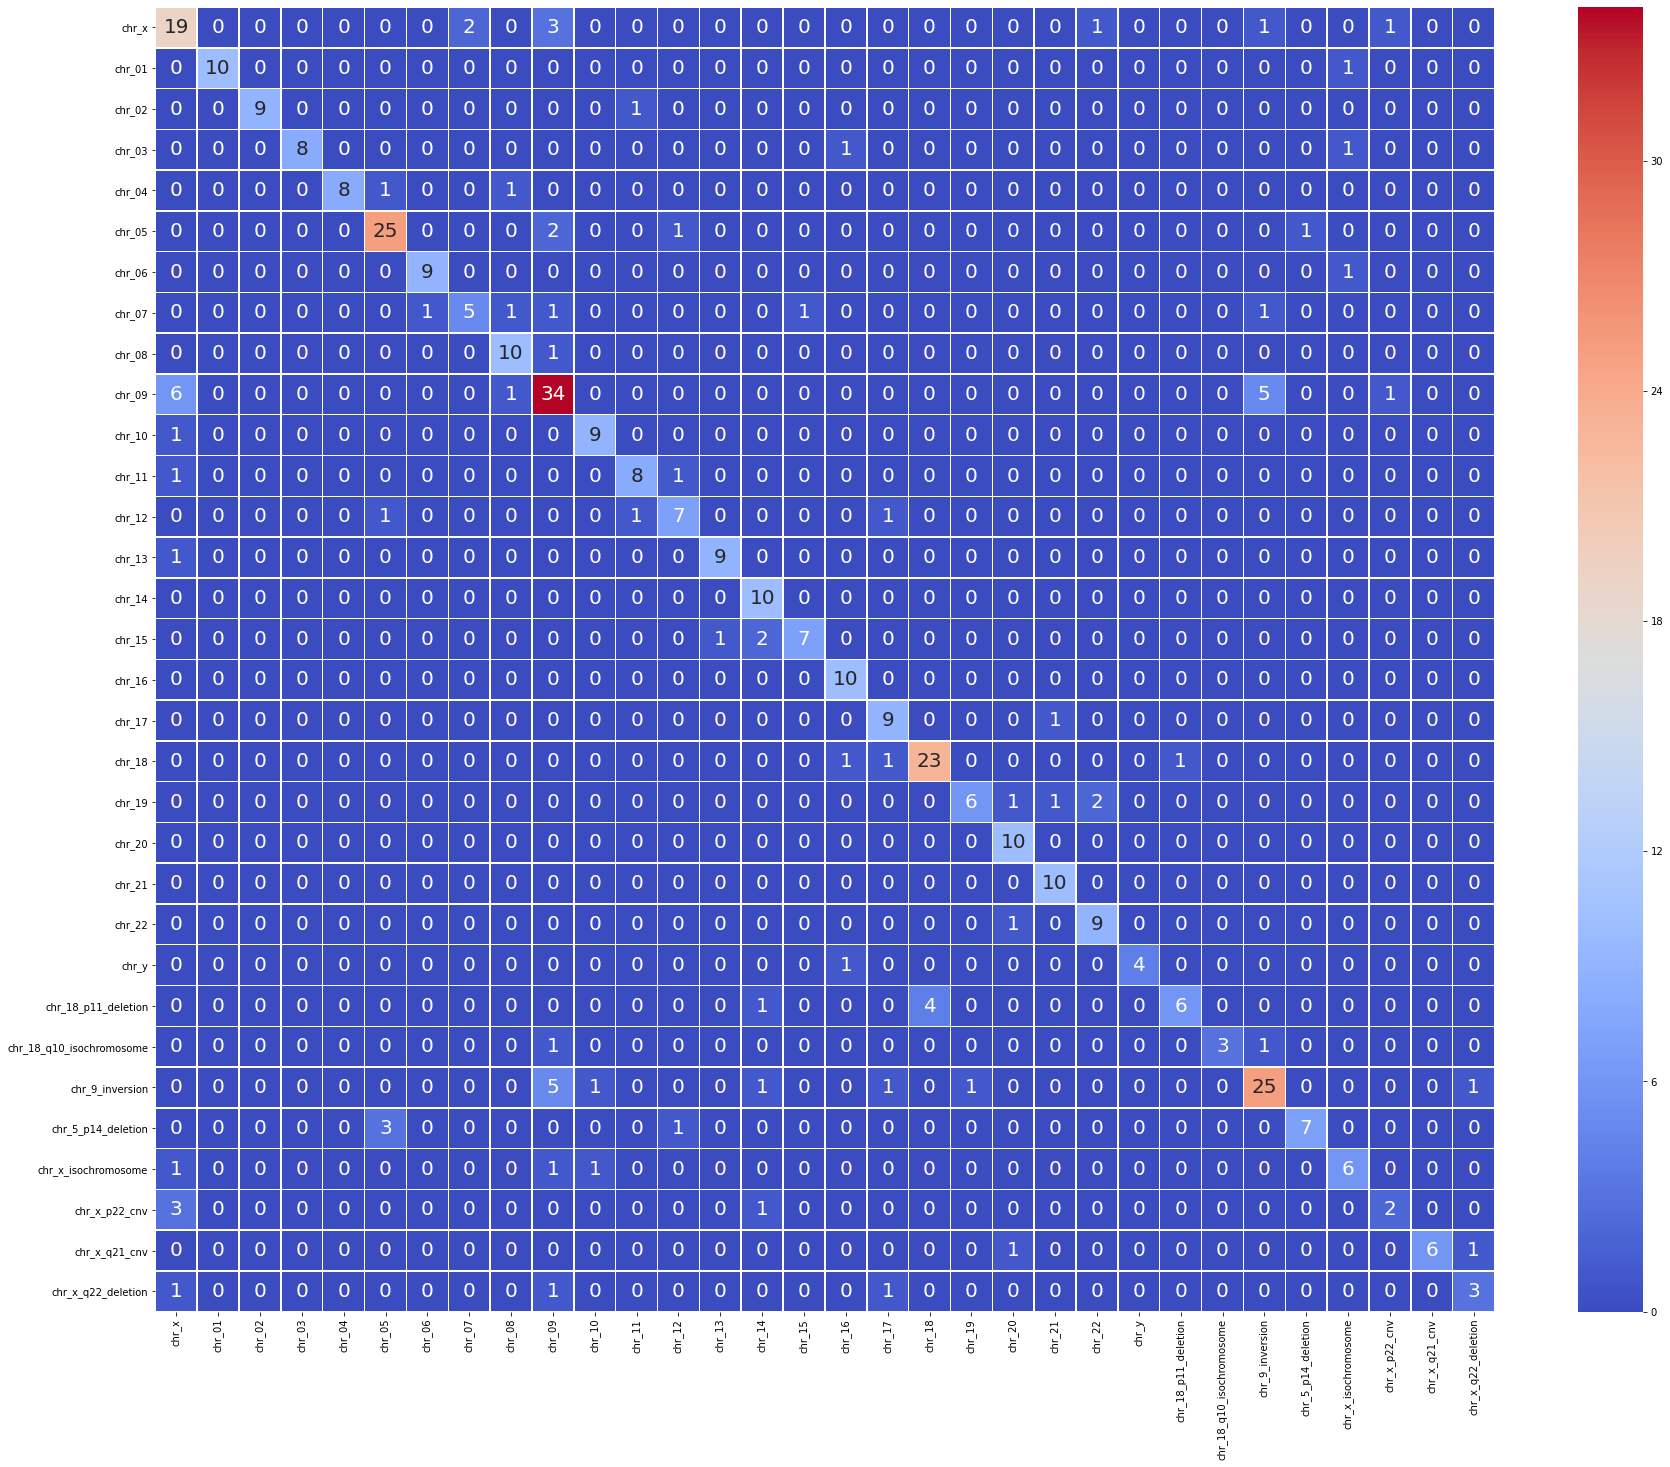

In [55]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

# Iteration 1

### Image Input

#### Assignment of Training Data

In [56]:
iteration_number = 1

In [57]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][iteration_number]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

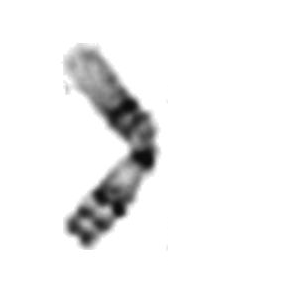

In [58]:
image['chr_01'][1]

### Data Extraction from Images

#### Training Set Data

In [59]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [60]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

#### Testing Set Data

In [61]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][iteration_number]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

In [62]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [63]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### ChromConvert

In [64]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### Change to Numpy Array

In [65]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [66]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [67]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,
       17, 17, 17, 17, 17

In [68]:
len(X_train)

2454

In [69]:
X_train[0].shape

(300, 300)

### Convolutional Neural Network

#### Data Preparation

In [70]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

#### Training

- Model

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [73]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

- Tensorboard Initilization

In [74]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


- Compile the modal

In [75]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- Fitting

In [76]:
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/200
39/39 [==============================] - 7s 171ms/step - loss: 17.2029 - accuracy: 0.0770 - val_loss: 3.3879 - val_accuracy: 0.0607
Epoch 2/200
39/39 [==============================] - 5s 120ms/step - loss: 3.3826 - accuracy: 0.1015 - val_loss: 3.3334 - val_accuracy: 0.1141
Epoch 3/200
39/39 [==============================] - 5s 123ms/step - loss: 3.3716 - accuracy: 0.0888 - val_loss: 3.3171 - val_accuracy: 0.0850
Epoch 4/200
39/39 [==============================] - 5s 123ms/step - loss: 3.2791 - accuracy: 0.0949 - val_loss: 3.3397 - val_accuracy: 0.1117
Epoch 5/200
39/39 [==============================] - 5s 119ms/step - loss: 3.0346 - accuracy: 0.1536 - val_loss: 2.7909 - val_accuracy: 0.2403
Epoch 6/200
39/39 [==============================] - 5s 119ms/step - loss: 2.3882 - accuracy: 0.3089 - val_loss: 2.0936 - val_accuracy: 0.3447
Epoch 7/200
39/39 [==============================] - 5s 123ms/step - loss: 2.6216 - accuracy: 0.2783 - val_loss: 2.4299 - val_accuracy: 0.325

Epoch 58/200
39/39 [==============================] - 5s 126ms/step - loss: 2.1782 - accuracy: 0.3851 - val_loss: 3.6292 - val_accuracy: 0.1942
Epoch 59/200
39/39 [==============================] - 5s 128ms/step - loss: 2.1738 - accuracy: 0.3871 - val_loss: 3.7293 - val_accuracy: 0.1845
Epoch 60/200
39/39 [==============================] - 5s 125ms/step - loss: 2.1409 - accuracy: 0.3920 - val_loss: 3.7126 - val_accuracy: 0.2039
Epoch 61/200
39/39 [==============================] - 5s 124ms/step - loss: 2.1263 - accuracy: 0.3969 - val_loss: 4.1424 - val_accuracy: 0.1942
Epoch 62/200
39/39 [==============================] - 5s 124ms/step - loss: 2.1065 - accuracy: 0.3977 - val_loss: 3.5919 - val_accuracy: 0.1820
Epoch 63/200
39/39 [==============================] - 5s 120ms/step - loss: 2.0831 - accuracy: 0.4022 - val_loss: 3.6756 - val_accuracy: 0.1942
Epoch 64/200
39/39 [==============================] - 5s 122ms/step - loss: 2.0890 - accuracy: 0.4022 - val_loss: 3.8677 - val_accuracy:

Epoch 115/200
39/39 [==============================] - 5s 118ms/step - loss: 0.0932 - accuracy: 0.9682 - val_loss: 5.7538 - val_accuracy: 0.4733
Epoch 116/200
39/39 [==============================] - 5s 118ms/step - loss: 0.0824 - accuracy: 0.9772 - val_loss: 6.0719 - val_accuracy: 0.4345
Epoch 117/200
39/39 [==============================] - 5s 120ms/step - loss: 0.0835 - accuracy: 0.9731 - val_loss: 6.0051 - val_accuracy: 0.4539
Epoch 118/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0709 - accuracy: 0.9825 - val_loss: 5.5168 - val_accuracy: 0.4660
Epoch 119/200
39/39 [==============================] - 5s 124ms/step - loss: 0.1079 - accuracy: 0.9719 - val_loss: 5.8680 - val_accuracy: 0.4660
Epoch 120/200
39/39 [==============================] - 5s 125ms/step - loss: 0.0965 - accuracy: 0.9719 - val_loss: 4.8547 - val_accuracy: 0.4563
Epoch 121/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0766 - accuracy: 0.9808 - val_loss: 6.1969 - val_ac

39/39 [==============================] - 6s 156ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 4.3301 - val_accuracy: 0.5437
Epoch 172/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 4.2648 - val_accuracy: 0.5485
Epoch 173/200
39/39 [==============================] - 5s 136ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 4.3596 - val_accuracy: 0.5510
Epoch 174/200
39/39 [==============================] - 5s 128ms/step - loss: 0.0102 - accuracy: 0.9963 - val_loss: 4.5155 - val_accuracy: 0.5485
Epoch 175/200
39/39 [==============================] - 5s 133ms/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 4.7708 - val_accuracy: 0.5485
Epoch 176/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 4.7759 - val_accuracy: 0.5461
Epoch 177/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0074 - accuracy: 0.9967 - val_loss: 4.9842 - val_accuracy: 0.5485

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 322624)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)              

- Tensorboard Display

In [78]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19276), started 9 days, 8:18:40 ago. (Use '!kill 19276' to kill it.)

#### Save the Model

In [79]:
model.save('saved_model/model_allClass_cnn_iteration_'+str(iteration_number))

INFO:tensorflow:Assets written to: saved_model/model_allClass_cnn_iteration_1\assets


#### Load the Model

In [80]:
model_reload = keras.models.load_model('saved_model/model_allClass_cnn_iteration_'+str(iteration_number))

### Performance Measures

In [81]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.541


In [82]:
len(X_test)

412

In [83]:
y_predict = model_reload.predict(X_test)

In [84]:
len(y_predict)

412

In [85]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

#### Confusion Matrix (混淆矩阵)

In [86]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

In [87]:
label_convert

['chr_x',
 'chr_01',
 'chr_02',
 'chr_03',
 'chr_04',
 'chr_05',
 'chr_06',
 'chr_07',
 'chr_08',
 'chr_09',
 'chr_10',
 'chr_11',
 'chr_12',
 'chr_13',
 'chr_14',
 'chr_15',
 'chr_16',
 'chr_17',
 'chr_18',
 'chr_19',
 'chr_20',
 'chr_21',
 'chr_22',
 'chr_y',
 'chr_18_p11_deletion',
 'chr_18_q10_isochromosome',
 'chr_9_inversion',
 'chr_5_p14_deletion',
 'chr_x_isochromosome',
 'chr_x_p22_cnv',
 'chr_x_q21_cnv',
 'chr_x_q22_deletion']

In [88]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,17,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,1,0,2
chr_01,0,7,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,2,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
chr_04,1,2,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,1,0,0,1,22,0,0,0,3,...,0,0,0,0,0,2,0,0,0,0
chr_06,0,0,0,1,0,0,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,1,0,0,0,0,0,0,5,0,2,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,1,0,0,0,0,1,4,1,...,0,0,0,0,0,0,0,0,1,1
chr_09,3,1,1,0,1,2,0,0,1,28,...,0,1,0,0,3,0,0,1,0,3


#### Report

In [89]:
performanceReport[iteration_number] = classification_report(y_test, y_predict_filtered, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport[iteration_number])

                          precision    recall  f1-score   support

                   chr_x       0.53      0.63      0.58        27
                  chr_01       0.44      0.64      0.52        11
                  chr_02       0.64      0.70      0.67        10
                  chr_03       0.88      0.70      0.78        10
                  chr_04       0.43      0.60      0.50        10
                  chr_05       0.73      0.76      0.75        29
                  chr_06       1.00      0.60      0.75        10
                  chr_07       0.62      0.50      0.56        10
                  chr_08       0.50      0.40      0.44        10
                  chr_09       0.52      0.60      0.55        47
                  chr_10       0.56      0.50      0.53        10
                  chr_11       0.33      0.20      0.25        10
                  chr_12       0.82      0.90      0.86        10
                  chr_13       0.29      0.40      0.33        10
         

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Heat Map

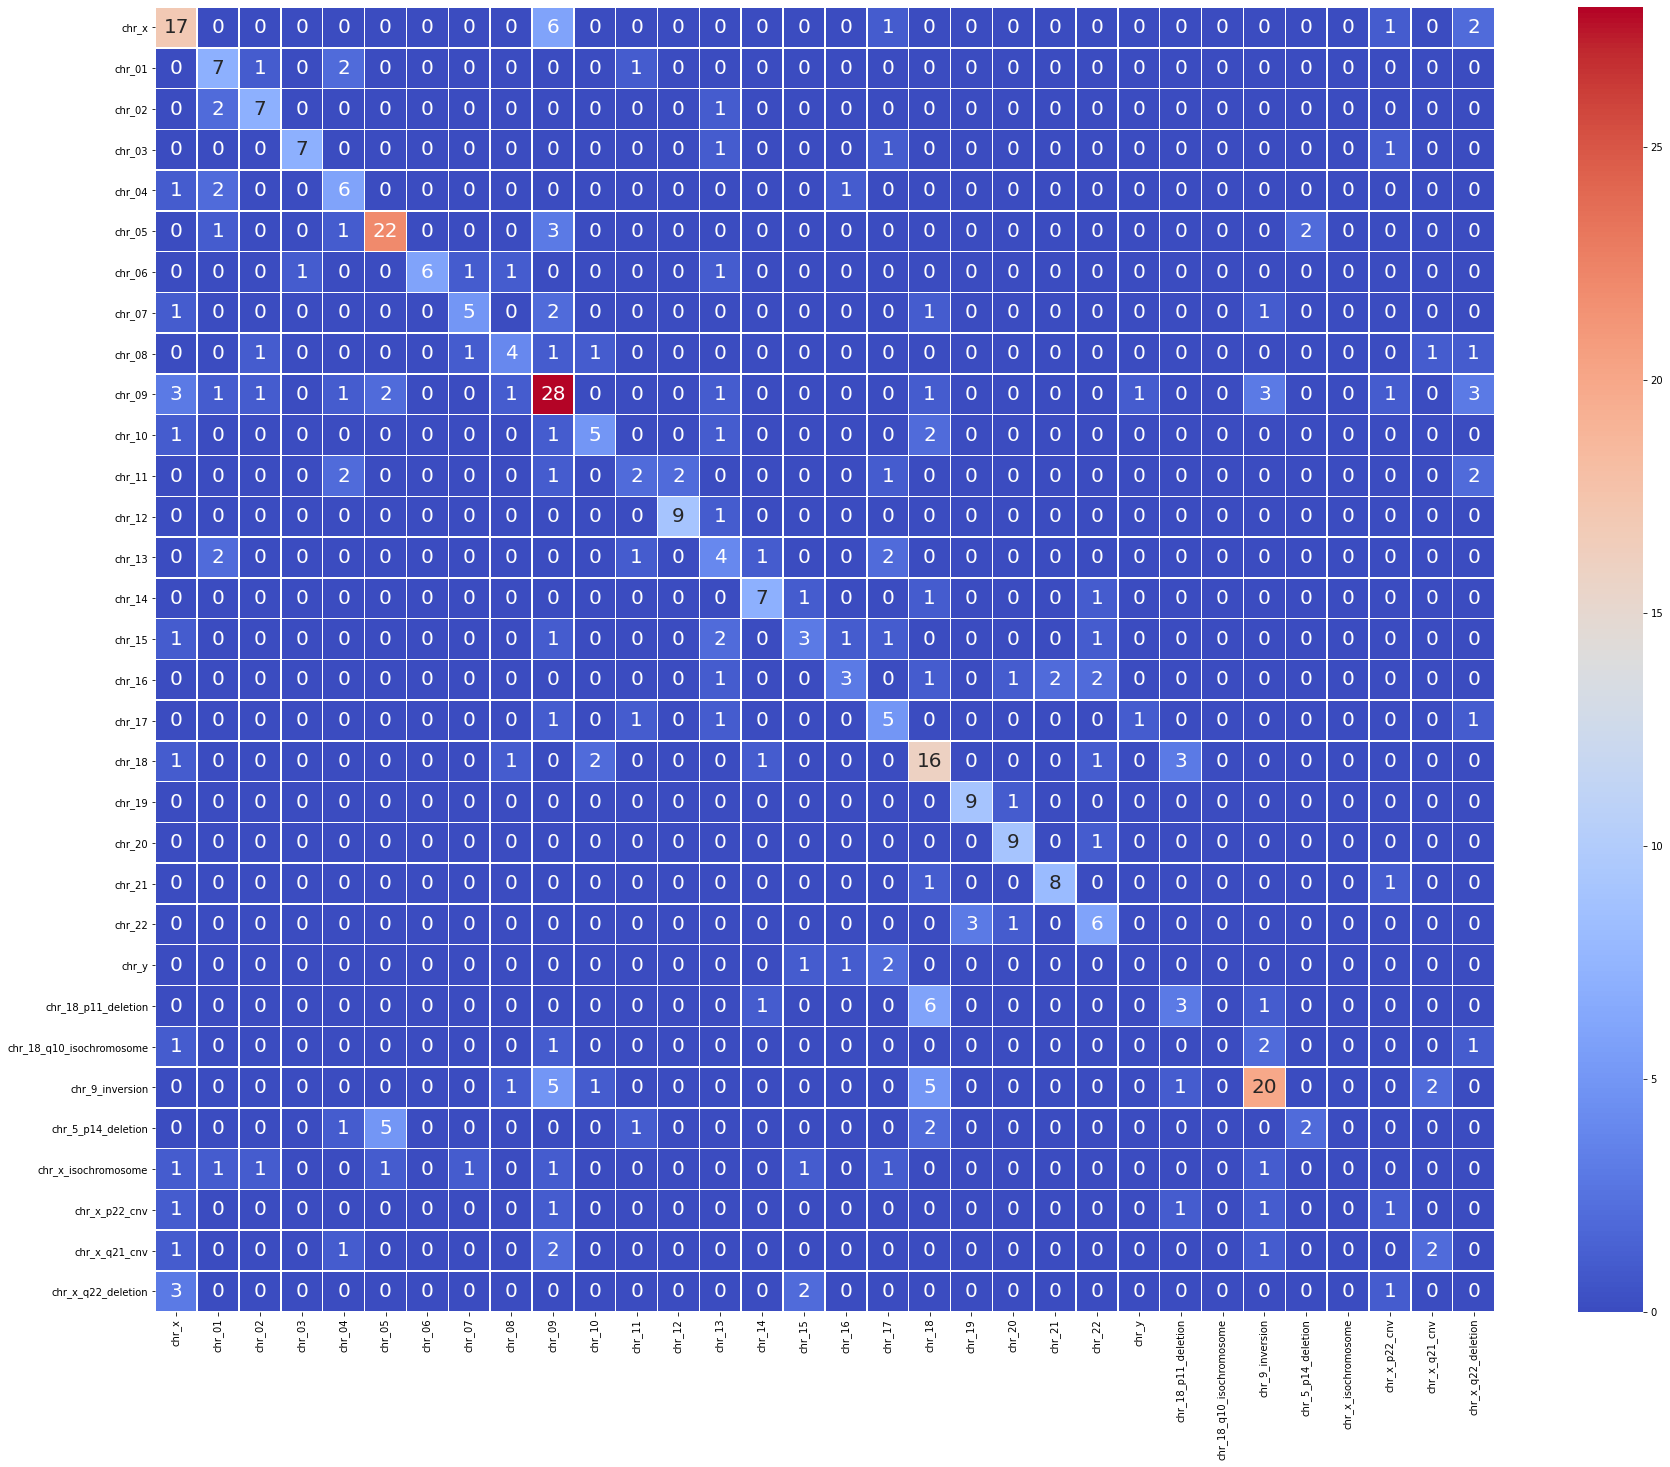

In [90]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

# Iteration 2

### Image Input

#### Assignment of Training Data

In [91]:
iteration_number = 2

In [92]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][iteration_number]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

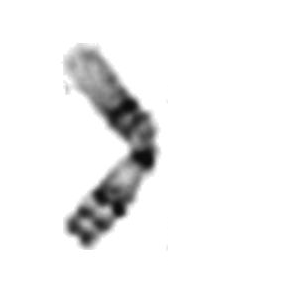

In [93]:
image['chr_01'][1]

### Data Extraction from Images

#### Training Set Data

In [94]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [95]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

#### Testing Set Data

In [96]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][iteration_number]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

In [97]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [98]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### ChromConvert

In [99]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### Change to Numpy Array

In [100]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [101]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [102]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,
       17, 17, 17, 17, 17

In [103]:
len(X_train)

2454

In [104]:
X_train[0].shape

(300, 300)

### Convolutional Neural Network

#### Data Preparation

In [105]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

#### Training

- Model

In [106]:
model = Sequential()

In [107]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [108]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

- Tensorboard Initilization

In [109]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


- Compile the modal

In [110]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- Fitting

In [111]:
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/200
39/39 [==============================] - 6s 141ms/step - loss: 8.9733 - accuracy: 0.0754 - val_loss: 3.4095 - val_accuracy: 0.1165
Epoch 2/200
39/39 [==============================] - 5s 121ms/step - loss: 3.4111 - accuracy: 0.1015 - val_loss: 3.2712 - val_accuracy: 0.0801
Epoch 3/200
39/39 [==============================] - 5s 132ms/step - loss: 3.1460 - accuracy: 0.1443 - val_loss: 3.1606 - val_accuracy: 0.1869
Epoch 4/200
39/39 [==============================] - 5s 133ms/step - loss: 3.2423 - accuracy: 0.1157 - val_loss: 2.9436 - val_accuracy: 0.1845
Epoch 5/200
39/39 [==============================] - 5s 129ms/step - loss: 2.6393 - accuracy: 0.2351 - val_loss: 2.3771 - val_accuracy: 0.2840
Epoch 6/200
39/39 [==============================] - 5s 132ms/step - loss: 3.3847 - accuracy: 0.2474 - val_loss: 2.6803 - val_accuracy: 0.2573
Epoch 7/200
39/39 [==============================] - 5s 123ms/step - loss: 2.2715 - accuracy: 0.3077 - val_loss: 2.6968 - val_accuracy: 0.3107

Epoch 58/200
39/39 [==============================] - 5s 122ms/step - loss: 0.1940 - accuracy: 0.9511 - val_loss: 1.0311 - val_accuracy: 0.8374
Epoch 59/200
39/39 [==============================] - 6s 146ms/step - loss: 0.1156 - accuracy: 0.9698 - val_loss: 1.0398 - val_accuracy: 0.8155
Epoch 60/200
39/39 [==============================] - 5s 127ms/step - loss: 0.0850 - accuracy: 0.9751 - val_loss: 1.1576 - val_accuracy: 0.8131
Epoch 61/200
39/39 [==============================] - 5s 126ms/step - loss: 0.0989 - accuracy: 0.9756 - val_loss: 1.3568 - val_accuracy: 0.8034
Epoch 62/200
39/39 [==============================] - 5s 126ms/step - loss: 0.1586 - accuracy: 0.9584 - val_loss: 1.0148 - val_accuracy: 0.8107
Epoch 63/200
39/39 [==============================] - 5s 125ms/step - loss: 0.1421 - accuracy: 0.9548 - val_loss: 1.3933 - val_accuracy: 0.7864
Epoch 64/200
39/39 [==============================] - 5s 126ms/step - loss: 0.1211 - accuracy: 0.9723 - val_loss: 1.1643 - val_accuracy:

Epoch 115/200
39/39 [==============================] - 5s 128ms/step - loss: 0.0028 - accuracy: 0.9980 - val_loss: 2.4112 - val_accuracy: 0.8058
Epoch 116/200
39/39 [==============================] - 6s 159ms/step - loss: 0.0025 - accuracy: 0.9984 - val_loss: 2.4165 - val_accuracy: 0.8107
Epoch 117/200
39/39 [==============================] - 5s 123ms/step - loss: 0.0025 - accuracy: 0.9984 - val_loss: 2.4395 - val_accuracy: 0.8131
Epoch 118/200
39/39 [==============================] - 5s 124ms/step - loss: 0.0028 - accuracy: 0.9988 - val_loss: 2.4750 - val_accuracy: 0.8083
Epoch 119/200
39/39 [==============================] - 5s 123ms/step - loss: 0.0026 - accuracy: 0.9984 - val_loss: 2.5223 - val_accuracy: 0.8083
Epoch 120/200
39/39 [==============================] - 5s 123ms/step - loss: 0.0024 - accuracy: 0.9984 - val_loss: 2.5550 - val_accuracy: 0.8083
Epoch 121/200
39/39 [==============================] - 5s 123ms/step - loss: 0.0022 - accuracy: 0.9980 - val_loss: 2.6064 - val_ac

39/39 [==============================] - 5s 123ms/step - loss: 0.3292 - accuracy: 0.9071 - val_loss: 1.4804 - val_accuracy: 0.7306
Epoch 172/200
39/39 [==============================] - 5s 118ms/step - loss: 0.3293 - accuracy: 0.9087 - val_loss: 1.6995 - val_accuracy: 0.7403
Epoch 173/200
39/39 [==============================] - 5s 116ms/step - loss: 0.2613 - accuracy: 0.9279 - val_loss: 1.5344 - val_accuracy: 0.7816
Epoch 174/200
39/39 [==============================] - 5s 117ms/step - loss: 0.1940 - accuracy: 0.9487 - val_loss: 1.4328 - val_accuracy: 0.7864
Epoch 175/200
39/39 [==============================] - 5s 117ms/step - loss: 0.2241 - accuracy: 0.9364 - val_loss: 1.6115 - val_accuracy: 0.7791
Epoch 176/200
39/39 [==============================] - 5s 119ms/step - loss: 0.3073 - accuracy: 0.9193 - val_loss: 1.8377 - val_accuracy: 0.8010
Epoch 177/200
39/39 [==============================] - 6s 153ms/step - loss: 0.2440 - accuracy: 0.9307 - val_loss: 2.3332 - val_accuracy: 0.7427

In [112]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 322624)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)              

- Tensorboard Display

In [113]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19276), started 9 days, 8:57:53 ago. (Use '!kill 19276' to kill it.)

#### Save the Model

In [114]:
model.save('saved_model/model_allClass_cnn_iteration_'+str(iteration_number))

INFO:tensorflow:Assets written to: saved_model/model_allClass_cnn_iteration_2\assets


#### Load the Model

In [115]:
model_reload = keras.models.load_model('saved_model/model_allClass_cnn_iteration_'+str(iteration_number))

### Performance Measures

In [116]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.765


In [117]:
len(X_test)

412

In [118]:
y_predict = model_reload.predict(X_test)

In [119]:
len(y_predict)

412

In [120]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

#### Confusion Matrix (混淆矩阵)

In [121]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

In [122]:
label_convert

['chr_x',
 'chr_01',
 'chr_02',
 'chr_03',
 'chr_04',
 'chr_05',
 'chr_06',
 'chr_07',
 'chr_08',
 'chr_09',
 'chr_10',
 'chr_11',
 'chr_12',
 'chr_13',
 'chr_14',
 'chr_15',
 'chr_16',
 'chr_17',
 'chr_18',
 'chr_19',
 'chr_20',
 'chr_21',
 'chr_22',
 'chr_y',
 'chr_18_p11_deletion',
 'chr_18_q10_isochromosome',
 'chr_9_inversion',
 'chr_5_p14_deletion',
 'chr_x_isochromosome',
 'chr_x_p22_cnv',
 'chr_x_q21_cnv',
 'chr_x_q22_deletion']

In [123]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_22,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_x,20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,1,0,0,1,0,0
chr_01,0,9,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,1,8,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,0,0,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,1,0,1,0,2,20,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
chr_06,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
chr_07,0,0,0,0,0,0,0,8,0,1,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,8,2,...,0,0,0,0,0,0,0,0,0,0
chr_09,4,0,0,0,0,0,0,0,1,36,...,0,0,0,0,4,0,0,0,0,2


#### Report

In [124]:
performanceReport[iteration_number] = classification_report(y_test, y_predict_filtered, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport[iteration_number])

                          precision    recall  f1-score   support

                   chr_x       0.71      0.74      0.73        27
                  chr_01       0.75      0.82      0.78        11
                  chr_02       0.73      0.80      0.76        10
                  chr_03       1.00      1.00      1.00        10
                  chr_04       0.78      0.70      0.74        10
                  chr_05       0.71      0.69      0.70        29
                  chr_06       0.89      0.80      0.84        10
                  chr_07       0.89      0.80      0.84        10
                  chr_08       0.89      0.80      0.84        10
                  chr_09       0.71      0.77      0.73        47
                  chr_10       0.89      0.80      0.84        10
                  chr_11       0.67      0.80      0.73        10
                  chr_12       0.78      0.70      0.74        10
                  chr_13       0.90      0.90      0.90        10
         

#### Heat Map

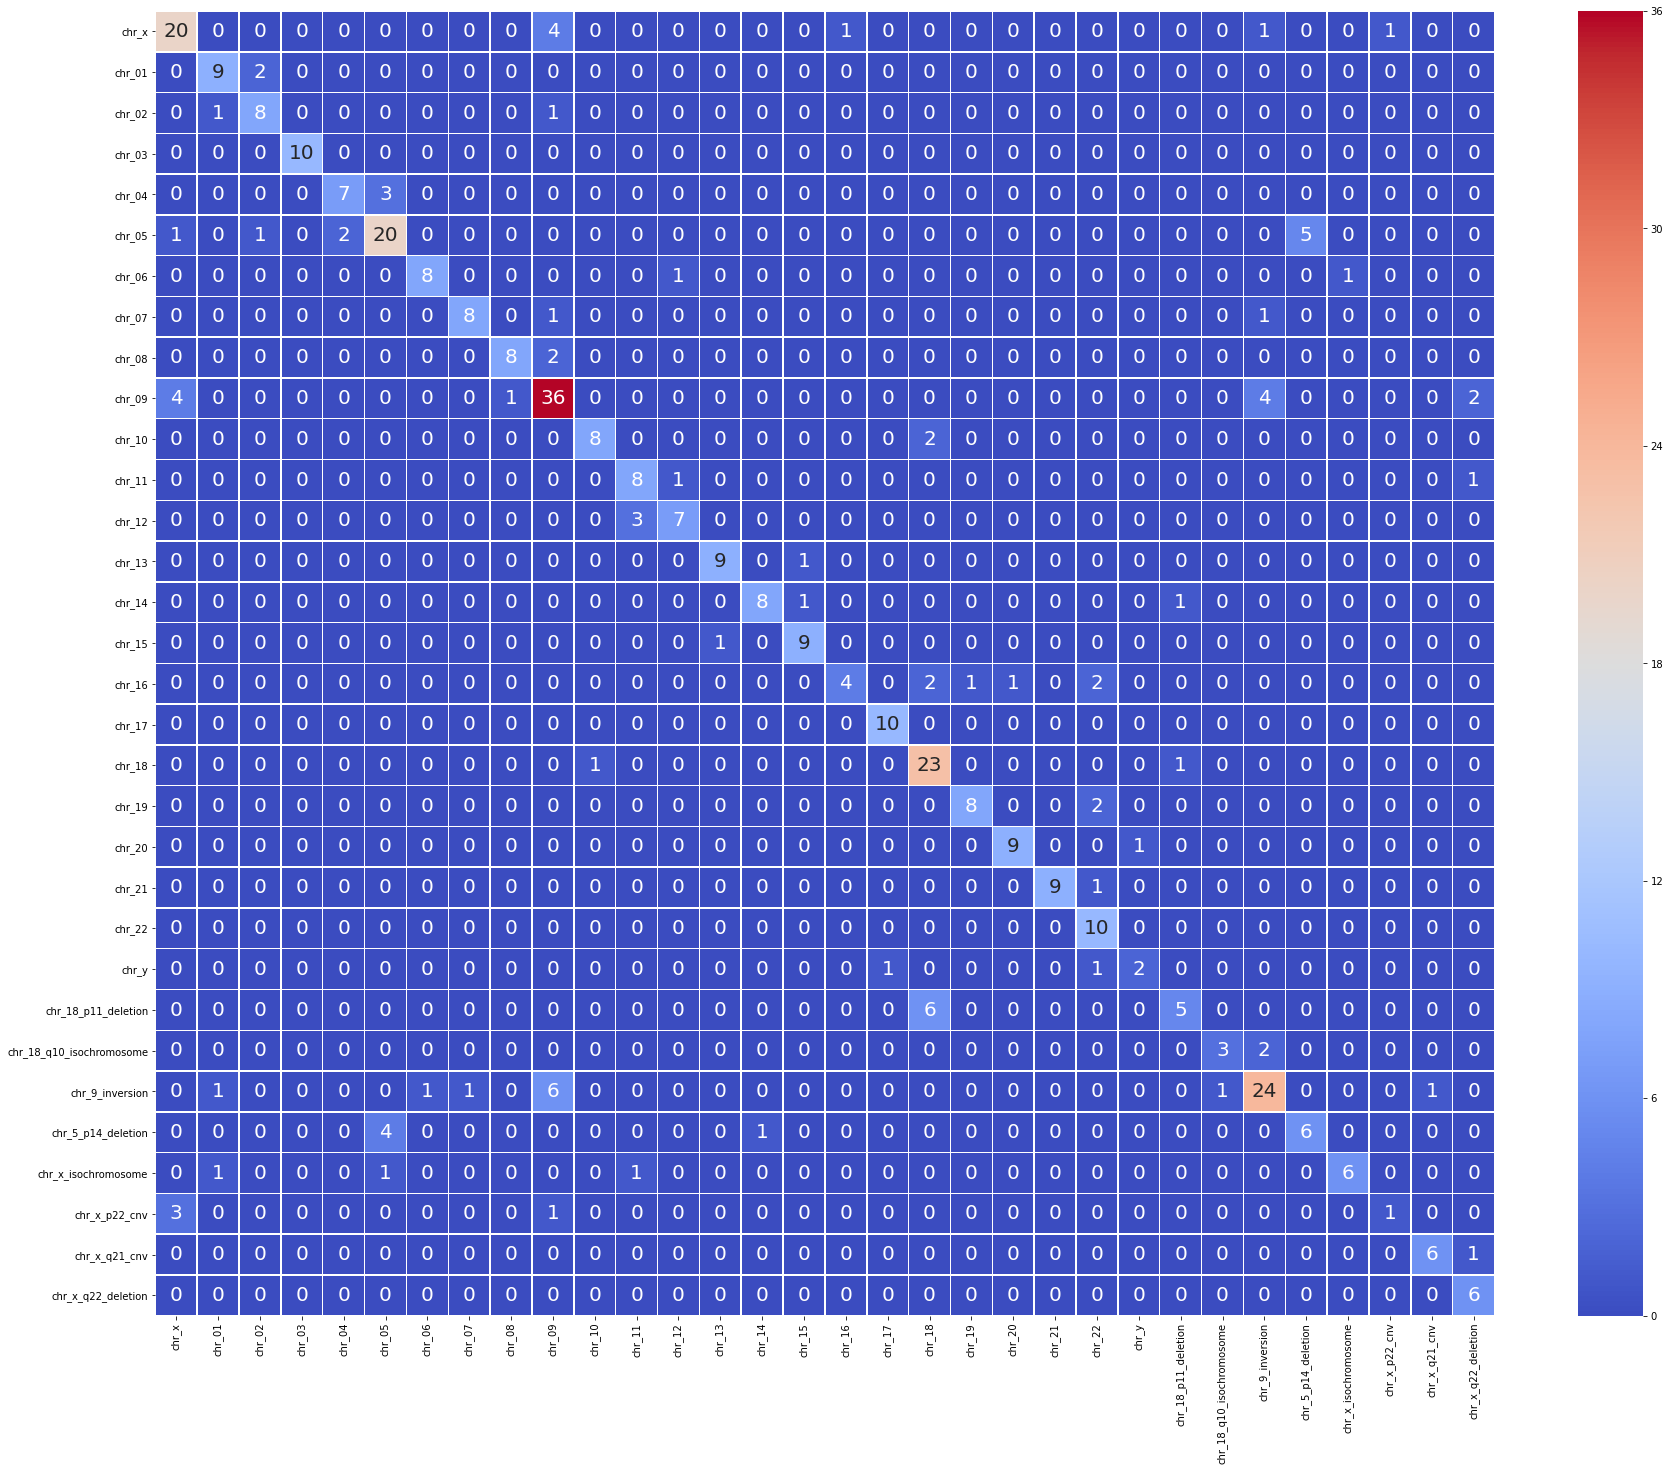

In [125]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

In [128]:
performanceReport[0]

'                          precision    recall  f1-score   support\n\n                   chr_x       0.58      0.70      0.63        27\n                  chr_01       1.00      0.91      0.95        11\n                  chr_02       1.00      0.90      0.95        10\n                  chr_03       1.00      0.80      0.89        10\n                  chr_04       1.00      0.80      0.89        10\n                  chr_05       0.83      0.86      0.85        29\n                  chr_06       0.90      0.90      0.90        10\n                  chr_07       0.71      0.50      0.59        10\n                  chr_08       0.77      0.91      0.83        11\n                  chr_09       0.69      0.72      0.71        47\n                  chr_10       0.82      0.90      0.86        10\n                  chr_11       0.80      0.80      0.80        10\n                  chr_12       0.70      0.70      0.70        10\n                  chr_13       0.90      0.90      0.90    